# Geospatial Primitives/Data Structures
### GIS 5571: Fall 2023

In this notebook, you will be able to get some reps in for working with geospatial primitives like points, lines, and polygons by using both `ArcPy` and creating some <u>*abstractions*</u> of these primitives and <u>*interfaces*</u> to work with them.

You will need to following packages.

Python:
- `arcpy`
- `shapely` (optional, has similar geometry capabilities as `arcpy` and can be installed on computers without ArcGIS Pro)

## Using ArcPy Primitives

In this first excerise, use ArcPy to create a Polygon out of Points. After creating the Polygon, print out at least three <u>attributes</u> (called properties in the ArcPy docs) of the object, and use at least two different <u>methods</u>.

You may need to look into the ArcPy documentation to complete this.

*NOTE:* Alternatively, you could use Shapely here, for the sake of this excercise, since it behaves similarly to ArcPy for working with primitives.

In [ ]:
# Put your code here
import arcpy

# Constructing Geometries
point1 = arcpy.Point(1, 1)
point2 = arcpy.Point(1, 2)
point3 = arcpy.Point(2, 2)

polygon = arcpy.Polygon([point1, point2, point3])

# Properties
print("JSON:", polygon.json)
print("Area:", polygon.area)
print("Hull Rectangle:", polygon.hullRectangle)

# Methods - Buffer & Boundary are some of the easiest
buffered_polygon = polygon.buffer(1)
print(buffered_polygon.wkt)

boundary = polygon.boundary()
print(boundary.wkt)

In [1]:
# Shapely Example
import shapely

# Constructing Geometries
shply_point1 = shapely.Point(1, 1)
shply_point2 = shapely.Point(1, 2)
shply_point3 = shapely.Point(2, 2)

shply_polygon = shapely.Polygon([shply_point1, shply_point2, shply_point3])

# Properties
print("WKT:", shply_polygon.wkt)
print("Area:", shply_polygon.area)
print("Bounds:", shply_polygon.bounds)

# Methods
shply_buffered_polygon = shply_polygon.buffer(1)
print(shply_buffered_polygon.wkt)

shply_contains = shply_polygon.contains(shapely.Point(5, 5))
print(shply_contains)

WKT: POLYGON ((1 1, 1 2, 2 2, 1 1))
Area: 0.5
Bounds: (1.0, 1.0, 2.0, 2.0)
POLYGON ((1.7071067811865475 0.2928932188134525, 1.6343932841636457 0.2269895466372631, 1.5555702330196017 0.1685303876974545, 1.4713967368259975 0.118078735651645, 1.38268343236509 0.0761204674887134, 1.290284677254462 0.0430596642677911, 1.1950903220161284 0.0192147195967696, 1.09801714032956 0.0048152733278031, 0.9999999999999998 0, 0.9019828596704396 0.0048152733278031, 0.8049096779838714 0.0192147195967697, 0.7097153227455375 0.0430596642677912, 0.6173165676349097 0.0761204674887135, 0.5286032631740021 0.1180787356516451, 0.4444297669803978 0.1685303876974548, 0.3656067158363548 0.2269895466372628, 0.2928932188134523 0.2928932188134525, 0.2269895466372629 0.3656067158363547, 0.1685303876974545 0.444429766980398, 0.118078735651645 0.5286032631740023, 0.0761204674887132 0.6173165676349104, 0.0430596642677911 0.709715322745538, 0.0192147195967696 0.8049096779838716, 0.0048152733278031 0.9019828596704395, 0 1, 

## Constructing your own Primitives

In the next excerise, you will create your own Point class (an abstraction) in Python which will have some basic methods (interfaces) and attributes to get and modify information about a Point object.

Create a Point class that takes in X and Y coordinates to construct the object, as well as an ID. Create a method called "info" which prints out the X, Y, and ID attributes, as well as a method called "change_id" which changes the ID of the Point. If you want a bit more of a challenge, create a method that returns the Well-Known Text (WKT) of the Point and use it to create a new WKT attibute in the constructor of the class.

<br>

### <u>Classes in Python</u>

```
# To create a class, use the following syntax
class MyClass:
    # Every class needs a method (declared the same way as a function) called __init__
    # This is called the constructor, because it is used when a new instance of the class is created
    def __init__(self, attr1, attr2):
        # For methods, we (almost) always include "self" as the first argument
        # This shows that the method belongs to the class
        # We also use it to assign instance attributes to an instance, like below
        self.attr1 = attr1
        self.attr2 = attr2
    
    def change_attr1(self, new_attr1):
        # A really easy way to change an instance attribute is to simply write over it, like this
        self.attr1 = new_attr1

        # This often isn't used in complex software, because it isn't very secure, but that's ok for us

    def show_attr1(self):
        # Here is an easy way to access and print out an instance attribute
        print(self.attr1)
```

<br>

#### You can use the example class by using the following code.

```    
# Create an Instance of the Class
example_object = MyClass("Attribute1", "Attribute2")

# Use the show_attr1 method
example_object.show_attr1()
>>> "Attribute1"

# Use the change_attr1 method
example_object.change_attr1("NewAttribute1")

# Use the show_attr1 method
example_object.show_attr1()
>>> "NewAttribute1"
```

In [2]:
# Put your code here
class Point:
    def __init__(self, x, y, id):
        self.x = x
        self.y = y
        self.id = id
        self.wkt = self._wkt()
    
    def info(self):
        print(f"x: {self.x}\ny: {self.y}\nid: {self.id}\nwkt: {self.wkt}")
        
    def change_id(self, new_id):
        self.id = new_id
        
    def _wkt(self):
        return f"POINT ({self.x} {self.y})"

In [3]:
# Create point
my_point = Point(0, 0, 999)

# Display Info
my_point.info()

x: 0
y: 0
id: 999
wkt: POINT (0 0)


In [4]:
# Change ID of point
my_point.change_id(111)

# Display Info
my_point.info()

x: 0
y: 0
id: 111
wkt: POINT (0 0)


## Challenge: Lines & Polygons from scratch

As a challenge, try creating Line and Polygon classes that are created from a list of points, with a method to return the geometries as WKT. You can try loading in the WKT result into Shapely to see if it is correct. Try implementing some checks to make sure that everything is done correctly to avoid bugs.

In [5]:
# Put your code here
class Line:
    def __init__(self, points: list[Point]):
        self.points = points
        self.wkt = self._create_wkt()
        
    def _create_wkt(self):
        wkt_string = ""
        
        for i in range(len(self.points)):
            wkt_string += str(self.points[i].x) + " " + str(self.points[i].y)
            
            if i == len(self.points)-1:
                return f"LINESTRING ({wkt_string})"
            
            else:
                wkt_string += ", "
                


p1 = Point(0, 0, 1)
p2 = Point(1, 2, 2)
p3 = Point(3, 4, 3)

l1 = Line([p1, p2, p3])

print(l1.wkt)    

LINESTRING (0 0, 1 2, 3 4)


In [6]:
# Put your code here
class Polygon:
    def __init__(self, points: list[Point]):
        self.points = points
        self._check_polygon_validity()
        self.wkt = self._create_wkt()
        
    def _create_wkt(self):
        wkt_string = ""
        
        for i in range(len(self.points)):
            wkt_string += str(self.points[i].x) + " " + str(self.points[i].y)
            
            if i == len(self.points)-1:
                return f"POLYGON (({wkt_string}))"
            
            else:
                wkt_string += ", "
                
    def _check_polygon_validity(self):
        x1 = self.points[0].x
        y1 = self.points[0].y
        
        xn = self.points[-1].x
        yn = self.points[-1].y
        
        if x1 != xn or y1 != yn:
            # Automatically close polygon with first point
            self.points.append(self.points[0])
            
            self._check_polygon_validity()
        
        # At least need a triangle (3 points, with duplicate of first point)
        if len(self.points) < 4:
            raise Exception("Polygon can not be closed")
                


p1 = Point(0, 0, 1)
p2 = Point(1, 2, 2)
p3 = Point(3, 4, 3)

ply1 = Polygon([p1, p2, p3])

print(ply1.wkt)

POLYGON ((0 0, 1 2, 3 4, 0 0))


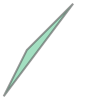

In [7]:
# Check with Shapely
import shapely.wkt

shapely.wkt.loads(ply1.wkt)

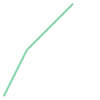

In [8]:
shapely.wkt.loads(l1.wkt)